<a href="https://colab.research.google.com/github/ausfear/Python/blob/main/Machine%20Learning%20Projects/Kelas%20Pengembangan%20ML/PengembanganML_4_Chessman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import zipfile

In [2]:
!wget --no-check-certificate \
  https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip \
  -O /tmp/Chessman-image-dataset.zip

--2021-08-07 14:29:55--  https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip [following]
--2021-08-07 14:29:55--  https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60684125 (58M) [application/zip]
Saving to: ‘/tmp/Chessman-image-dataset.zip’

/tmp/Chessman-image 100%[===================>]  57.87M   160MB/s    in 

In [3]:
file_zip = '/tmp/Chessman-image-dataset.zip'
zip_ref = zipfile.ZipFile(file_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
os.listdir('/tmp/Chessman-image-dataset/Chess')

['Pawn', 'King', 'Rook', 'Knight', 'Queen', 'Bishop']

In [5]:
print('gambar pawn = ', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Pawn')))
print('gambar king = ', len(os.listdir('/tmp/Chessman-image-dataset/Chess/King')))
print('gambar rook = ', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Rook')))
print('gambar knight = ', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Knight')))
print('gambar queen = ', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Queen')))
print('gambar bishop = ', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Bishop')))

gambar pawn =  107
gambar king =  76
gambar rook =  102
gambar knight =  106
gambar queen =  78
gambar bishop =  87


In [6]:
for folder in os.listdir('/tmp/Chessman-image-dataset/Chess'):
  print('gambar {} ='.format(folder), len(os.listdir('/tmp/Chessman-image-dataset/Chess/{}'.format(folder))))

gambar Pawn = 107
gambar King = 76
gambar Rook = 102
gambar Knight = 106
gambar Queen = 78
gambar Bishop = 87


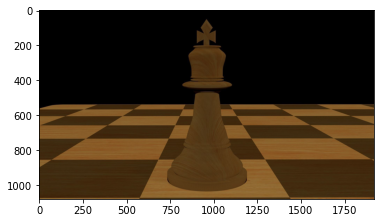

In [7]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

img = image.load_img('/tmp/Chessman-image-dataset/Chess/King/00000145.png')
imgplot = plt.imshow(img)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = os.path.join('/tmp/Chessman-image-dataset/Chess')
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   shear_range=0.2,
                                   fill_mode='nearest',
                                   validation_split=0.1)

In [9]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical',
    subset='training') # set as training data
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation')

Found 499 images belonging to 6 classes.
Found 52 images belonging to 6 classes.


In [10]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(6, activation='softmax')  
])

In [11]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [12]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              epochs=50,
                              verbose=2)

Epoch 1/50
63/63 - 36s - loss: 1.8635 - accuracy: 0.1623 - val_loss: 1.7794 - val_accuracy: 0.1923
Epoch 2/50
63/63 - 35s - loss: 1.7838 - accuracy: 0.1663 - val_loss: 1.7843 - val_accuracy: 0.1731
Epoch 3/50
63/63 - 35s - loss: 1.7869 - accuracy: 0.1784 - val_loss: 1.7798 - val_accuracy: 0.1923
Epoch 4/50
63/63 - 34s - loss: 1.7786 - accuracy: 0.1984 - val_loss: 1.7866 - val_accuracy: 0.1923
Epoch 5/50
63/63 - 34s - loss: 1.7678 - accuracy: 0.2064 - val_loss: 1.7792 - val_accuracy: 0.1923
Epoch 6/50
63/63 - 34s - loss: 1.7500 - accuracy: 0.2305 - val_loss: 1.7792 - val_accuracy: 0.1923
Epoch 7/50
63/63 - 34s - loss: 1.7571 - accuracy: 0.2244 - val_loss: 1.7820 - val_accuracy: 0.2115
Epoch 8/50
63/63 - 34s - loss: 1.7252 - accuracy: 0.2465 - val_loss: 1.7830 - val_accuracy: 0.2115
Epoch 9/50
63/63 - 34s - loss: 1.7121 - accuracy: 0.2605 - val_loss: 1.8020 - val_accuracy: 0.2308
Epoch 10/50
63/63 - 34s - loss: 1.6698 - accuracy: 0.2826 - val_loss: 1.7729 - val_accuracy: 0.1731
Epoch 11/

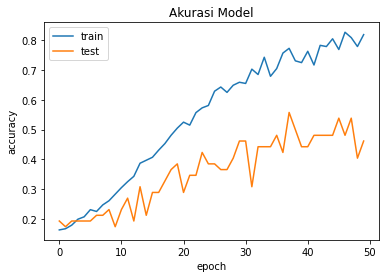

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

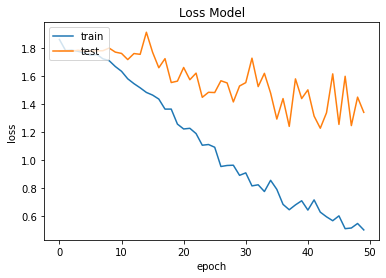

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()